<a href="https://colab.research.google.com/github/lebedevAU/N1/blob/main/%D0%94%D0%97_%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from tensorflow.keras.datasets import mnist #Библиотека с базой Mnist
from tensorflow.keras.models import Sequential # Подлючаем класс создания модели Sequential
from tensorflow.keras.layers import Dense # Подключаем класс Dense - полносвязный слой
from tensorflow.keras.optimizers import Adam # Подключаем оптимизатор Adam
from tensorflow.keras import utils #Утилиты для to_categorical
from tensorflow.keras.preprocessing import image #Для отрисовки изображения
import numpy as np # Подключаем библиотеку numpy
import pylab # Модуль для построения графиков
from mpl_toolkits.mplot3d import Axes3D # Модуль для трехмерной графики
from google.colab import files #Для загрузки своей картинки
import matplotlib.pyplot as plt #Отрисовка изображений
from PIL import Image #Отрисовка изображений
#Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline 

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/



Распознайте рукописную цифру, созданную вами с помощью графического редактора (например, Paint).

Последовательность шагов:
1. В графическом редакторе рисуем произвольную цифру.
2. Сохраняем документ и загружаем его в Colaboratory.
3. С помощью функции image.load_img(path, target_size=(28, 28), color_mode = ‘grayscale’) загружаем картинку в переменную.
4. С помощью функции image.img_to_array(img) преобразуем изображение в numpy-массив.
5. Выполняем инверсию цветов, нормирование и решейп массива.
6. Выполняем распознавание собственной рукописной цифры.

In [32]:
#image.load_img(path, target_size=(28, 28), color_mode = "grayscale")
imgU = image.load_img("/content/drive/My Drive/5.jpg", target_size=(28, 28), color_mode="grayscale")
#хер зная почему grayscale не работает, возможно из-за того что картинка уже grayscale 
image.img_to_array(imgU) 
imgU = np.asarray(imgU)
#imgU = Image.img_to_array(imgU)


In [33]:
print(type(imgU))

<class 'numpy.ndarray'>


In [2]:
# мое решение проще чем  УИИ
img = np.asarray(Image.open('/content/drive/My Drive/5.jpg')) 
img

NameError: ignored

In [11]:
model = Sequential() # Создаем класс модели
model.add(Dense(800, input_dim=784, activation='linear', use_bias=False))
model.add(Dense(400, input_dim=784, activation='linear', use_bias=False))
model.add(Dense(200, input_dim=784, activation='linear', use_bias=False))
model.add(Dense(10, activation="softmax"))
model.compile(optimizer=Adam(0.001), loss='mse') 
start_weights = model.get_weights()
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # Компилируем модель
print(model.summary()) #Вывод структуры модели

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               627200    
_________________________________________________________________
dense_1 (Dense)              (None, 400)               320000    
_________________________________________________________________
dense_2 (Dense)              (None, 200)               80000     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2010      
Total params: 1,029,210
Trainable params: 1,029,210
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [27]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
print(x_train.shape)
print(x_train.shape)

(60000, 784)
(60000, 784)


In [14]:
model.summary() # Отобразим данные созданной модели
(x_train, y_train), (x_test, y_test) = mnist.load_data()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               627200    
_________________________________________________________________
dense_1 (Dense)              (None, 400)               320000    
_________________________________________________________________
dense_2 (Dense)              (None, 200)               80000     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2010      
Total params: 1,029,210
Trainable params: 1,029,210
Non-trainable params: 0
_________________________________________________________________


In [15]:

print(x_train.shape)
print(x_train.shape)

(60000, 28, 28)
(60000, 28, 28)


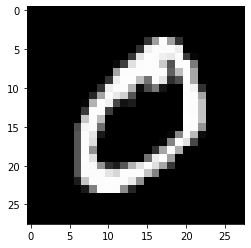

In [16]:
n = 1 #Номер картинки
plt.imshow(Image.fromarray(x_train[n]).convert('RGB')) #Отрисовка картинки
plt.show() # Вывод картинки

In [17]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
print(x_train.shape)
print(x_train.shape)

(60000, 784)
(60000, 784)


In [18]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"размерность X_train: {x_train.shape}")
print(f"размерность y_train: {y_train.shape}")
print(f"размерность x_test: {x_test.shape}")
print(f"размерность y_test: {y_test.shape}")

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
print(x_train.shape)
print(x_train.shape)

размерность X_train: (60000, 28, 28)
размерность y_train: (60000,)
размерность x_test: (10000, 28, 28)
размерность y_test: (10000,)
(60000, 784)
(60000, 784)


In [19]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

распознание

In [35]:
x = imgU
print(x)
#x = np.expand_dims(x, axis=0)
x = x.reshape(1, 784)
print(x.shape)
prediction = model.predict(x) 
print(prediction) 

[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 251]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 251]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 251]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 251]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 251]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 251]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 251]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 251]
 [254 255 255 255 255 255 255 255 255 255 255 255 255 209 188 20

In [26]:
model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1)


Epoch 1/15
469/469 [==============================] - 9s 19ms/step - loss: 20.1650 - accuracy: 0.8414
Epoch 2/15
469/469 [==============================] - 9s 19ms/step - loss: 4.4080 - accuracy: 0.8498
Epoch 3/15
469/469 [==============================] - 9s 19ms/step - loss: 3.6726 - accuracy: 0.8452
Epoch 4/15
469/469 [==============================] - 9s 19ms/step - loss: 2.9135 - accuracy: 0.8501
Epoch 5/15
469/469 [==============================] - 9s 19ms/step - loss: 2.0694 - accuracy: 0.8551
Epoch 6/15
469/469 [==============================] - 9s 19ms/step - loss: 1.6164 - accuracy: 0.8585
Epoch 7/15
469/469 [==============================] - 9s 19ms/step - loss: 1.2247 - accuracy: 0.8630
Epoch 8/15
469/469 [==============================] - 9s 19ms/step - loss: 0.9731 - accuracy: 0.8650
Epoch 9/15
469/469 [==============================] - 9s 19ms/step - loss: 0.7159 - accuracy: 0.8746
Epoch 10/15
469/469 [==============================] - 9s 19ms/step - loss: 0.5854 - accur